In [11]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\adria\tf_venv\Scripts\python.exe -m pip install --upgrade pip


In [15]:
%pip install scikit-learn


     ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
     -- ------------------------------------- 0.6/8.9 MB 17.8 MB/s eta 0:00:01
     -------------------- ------------------- 4.5/8.9 MB 57.0 MB/s eta 0:00:01
     ---------------------------------------  8.9/8.9 MB 81.4 MB/s eta 0:00:01
     ---------------------------------------  8.9/8.9 MB 81.4 MB/s eta 0:00:01
     ---------------------------------------- 8.9/8.9 MB 56.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/308.4 kB ? eta -:--:--
     ------------------------------------- 308.4/308.4 kB 18.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\adria\tf_venv\Scripts\python.exe -m pip install --upgrade pip


In [21]:

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Configuración de dimensiones de las imágenes
IMG_WIDTH, IMG_HEIGHT = 150, 150

# Definir rutas de las carpetas de entrenamiento y validación
train_dir = "V:/ProyectoMOCA/ProyectoDL/train"
validation_dir = "V:/ProyectoMOCA/ProyectoDL/validation"

#Se realiza un preprocesamiento en las images para el entrenamiento y la validación
##Entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalizar imágenes
    shear_range=0.2,            # Transformación aleatoria
    zoom_range=0.2,             # Zoom aleatorio
    horizontal_flip=True)       # Volteo horizontal de las imágenes

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical')    # Modo categórico para múltiples clases
##Validación
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical')



Found 17450 images belonging to 10 classes.
Found 2485 images belonging to 10 classes.


In [23]:
#Arquitectura CNN para extraer las caracteristicas 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))  # Capa final de características

#Con esto generamos una muestra inicial aleatoria para definir el modelo
sample_input = np.random.rand(1, IMG_WIDTH, IMG_HEIGHT, 3)
model.predict(sample_input)#Garantiza que el modelo conozca sus dimensiones de entrada antes de procesar los datos reales

1/1 [==============================] - 11s 11s/step


array([[0.        , 0.07010749, 0.        , 0.3152694 , 0.23101035,
        0.075905  , 0.        , 0.        , 0.        , 0.1175725 ,
        0.09540458, 0.        , 0.        , 0.08306971, 0.23200917,
        0.        , 0.20589548, 0.        , 0.        , 0.        ,
        0.07664459, 0.        , 0.        , 0.        , 0.07905026,
        0.17327638, 0.02875797, 0.06034458, 0.        , 0.12947796,
        0.        , 0.        , 0.        , 0.        , 0.02985645,
        0.        , 0.07634136, 0.15795198, 0.18144037, 0.09657171,
        0.        , 0.        , 0.20496988, 0.        , 0.        ,
        0.        , 0.22857259, 0.07058557, 0.02532654, 0.16909915,
        0.        , 0.09615467, 0.        , 0.09612909, 0.        ,
        0.02754956, 0.        , 0.15973413, 0.00508134, 0.        ,
        0.        , 0.05476735, 0.        , 0.00689081, 0.        ,
        0.        , 0.07299686, 0.        , 0.        , 0.        ,
        0.11310727, 0.        , 0.        , 0.12

In [25]:

# Extraer imágenes y etiquetas del generador para usar con KNN
X_train, y_train = [], [] #Se generan listas vacias donde se guardaran las caracteristicas
train_iter = iter(train_generator)  # Crear un iterador explícito para el generador

for i in range(len(train_generator)):#Se comienza con las extraccion de caractetisticas por lotes
    batch = next(train_iter) 
    X_train.extend(batch[0])   # Agregar imágenes al arreglo
    y_train.extend(batch[1])   # Agregar etiquetas al arreglo

X_train = np.array(X_train) #Se requiere convetir los vectores a arreglos numpy que son el formato para trabajr con KNN
y_train = np.array(y_train)


# Extraer características de entrenamiento usando la CNN
features = model.predict(X_train)


546/546 [==============================] - 15s 26ms/step


In [27]:
# Separar datos de entrenamiento y validación
X_train_feats, X_val_feats, y_train_labels, y_val_labels = train_test_split(features, y_train, test_size=0.2)

In [29]:
# Entrenar y evaluar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_feats, y_train_labels.argmax(axis=1))  # Convertir etiquetas one-hot a índices





# Evaluar KNN en el conjunto de validación
y_pred = knn.predict(X_val_feats)
accuracy = accuracy_score(y_val_labels.argmax(axis=1), y_pred)
print(f'Accuracy del KNN: {accuracy}')

Accuracy del KNN: 0.8756446991404011


In [33]:
%pip install seaborn


     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     -------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
     ----------- --------------------------- 3.4/11.3 MB 109.3 MB/s eta 0:00:01
     -------------------------- ------------- 7.6/11.3 MB 97.7 MB/s eta 0:00:01
     -------------------------------------  11.3/11.3 MB 108.8 MB/s eta 0:00:01
     --------------------------------------- 11.3/11.3 MB 92.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/509.2 kB ? eta -:--:--
     ---------------------------------------- 509.2/509.2 kB ? eta 0:00:00
     ---------------------------------------- 0.0/347.8 kB ? eta -:--:--
     ------------------------------------- 347.8/347.8 kB 21.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\adria\tf_venv\Scripts\python.exe -m pip install --upgrade pip


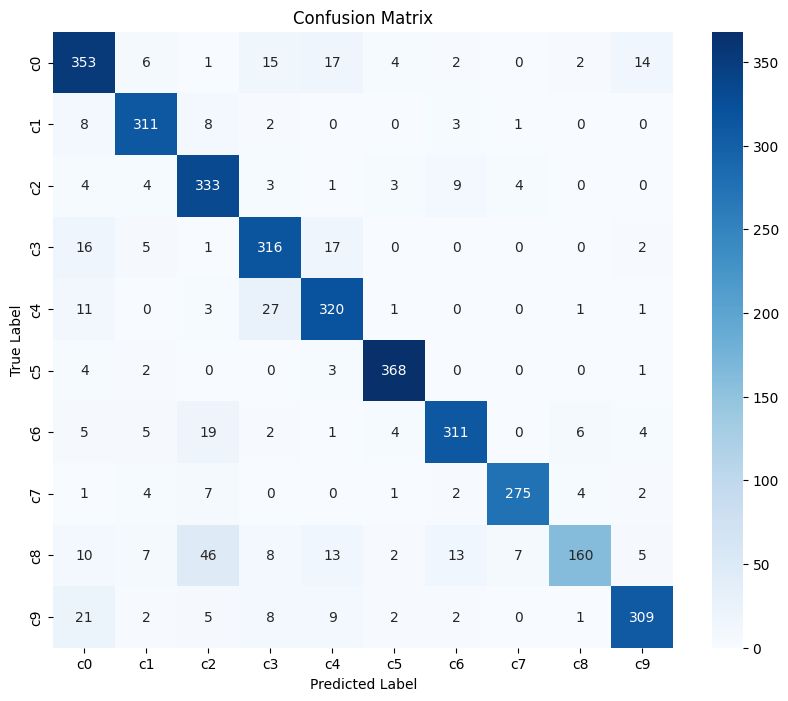

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Genera las predicciones en el conjunto de validación
y_pred = knn.predict(X_val_feats) 
y_true = y_val_labels.argmax(axis=1)  # Convertir etiquetas one-hot a índices
 
class_names = list(train_generator.class_indices.keys())

# Genera una matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'class_names' is not defined

<Figure size 1000x800 with 0 Axes>